In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/My\ Drive/data.zip

Archive:  gdrive/My Drive/data.zip
replace __MACOSX/._data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import glob
import numpy as np
from PIL import Image

training_data = []
labels = []
files = glob.glob('data/train/*.jpg')

for filepath in files:
    image = Image.open(filepath)
    image = image.resize((28, 28)) #change to 28,28
    training_data.append(np.array(image))
    if "cat" in filepath:
        labels.append(0)
    elif "dog" in filepath:
        labels.append(1)

training_data = np.array(training_data)
training_data = np.resize(training_data, (len(labels), 28, 28, 3))
training_data = training_data.astype('float32') / 255.

labels = np.array(labels)
labels = tensorflow.keras.utils.to_categorical(labels, 2)

In [ ]:


model.save('catsvdogs.h5')


In [ ]:
model = load_model('catsvdogs.h5')

In [ ]:

from tensorflow.keras.layers import Input
x_train = training_data
files2 = glob.glob('data/test1/*.jpg')
testing_data =[]
for filepath in files2:
    image = Image.open(filepath)
    image = image.resize((28, 28)) #change to 28,28
    testing_data.append(np.array(image))
    if "cat" in filepath:
        labels.append(0)
    elif "dog" in filepath:
        labels.append(1)
testing_data = np.array(testing_data)
testing_data = np.resize(testing_data, (len(labels), 28, 28, 3))
testing_data = testing_data.astype('float32') / 255.
x_test = testing_data



In [ ]:

x_train = np.reshape(x_train, (len(x_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 3))  # adapt this if using `channels_first` image data format

noise_factor = 0.0001
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_img = Input(shape=(28, 28, 3))  # adapt this if using `channels_first` image data format

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
# Encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPooling2D((2, 2))(x2)
encoded = Conv2D(28, (3, 3), activation='relu', padding='same')(x2)

# Decoding architecture
x3 = Conv2D(28, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=2, mode='auto')

a_e = autoencoder.fit(x_train_noisy, x_train,
                      epochs=10,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test_noisy, x_test),
                      callbacks=[early_stopper])

autoencoder.save('catsvdogs_10epochs_lownoise.h5')




Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 256)       7168      
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 28)        32284     
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 28)        7084      
                                                           

In [ ]:
predictions = autoencoder.predict(x_test_noisy)

782/782 [==============================] - 9s 12ms/step


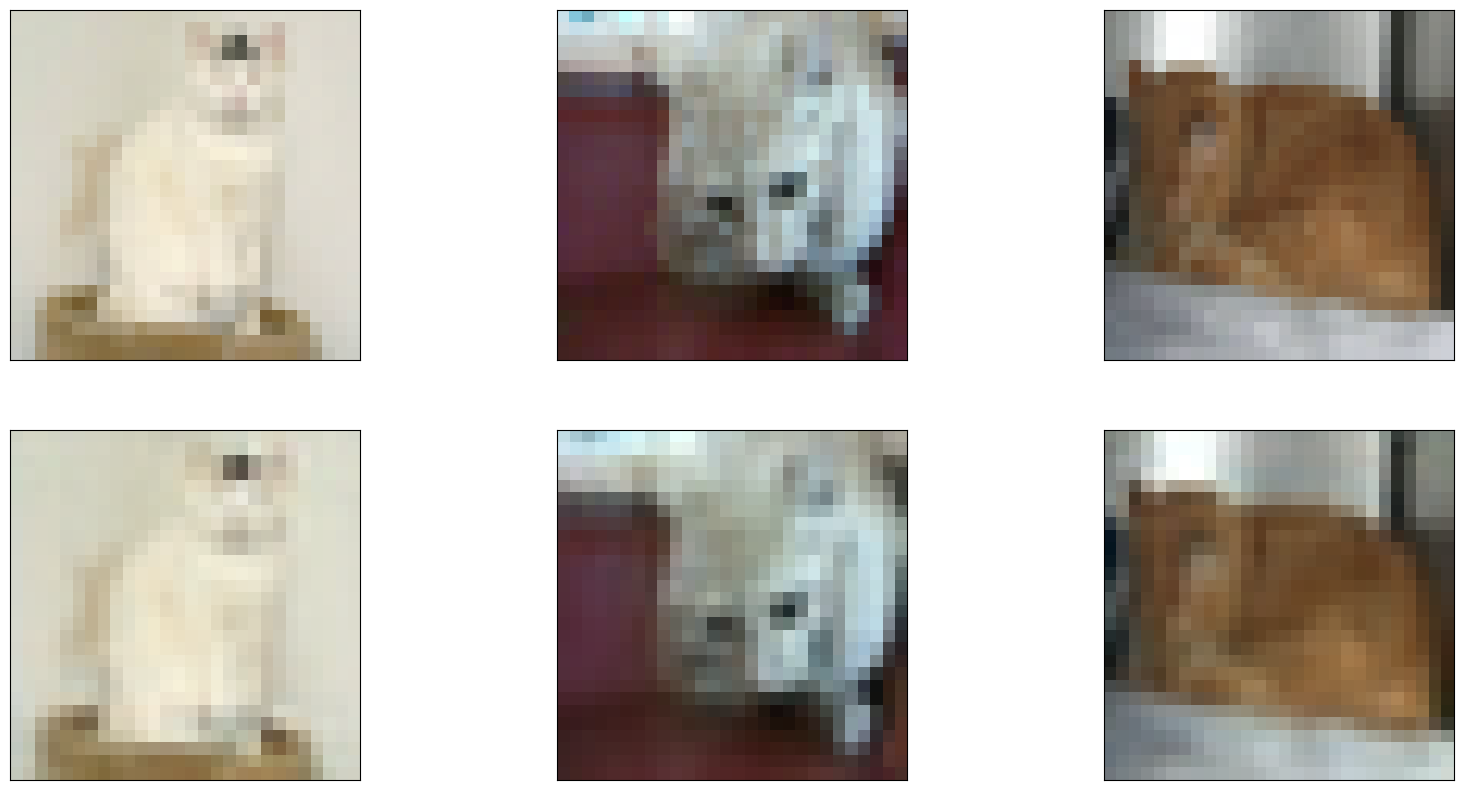

In [ ]:
import matplotlib.pyplot as plt
n = 3
plt.figure(figsize=(20, 10))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i + 20])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i + 20])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("cat202.png")
plt.show()


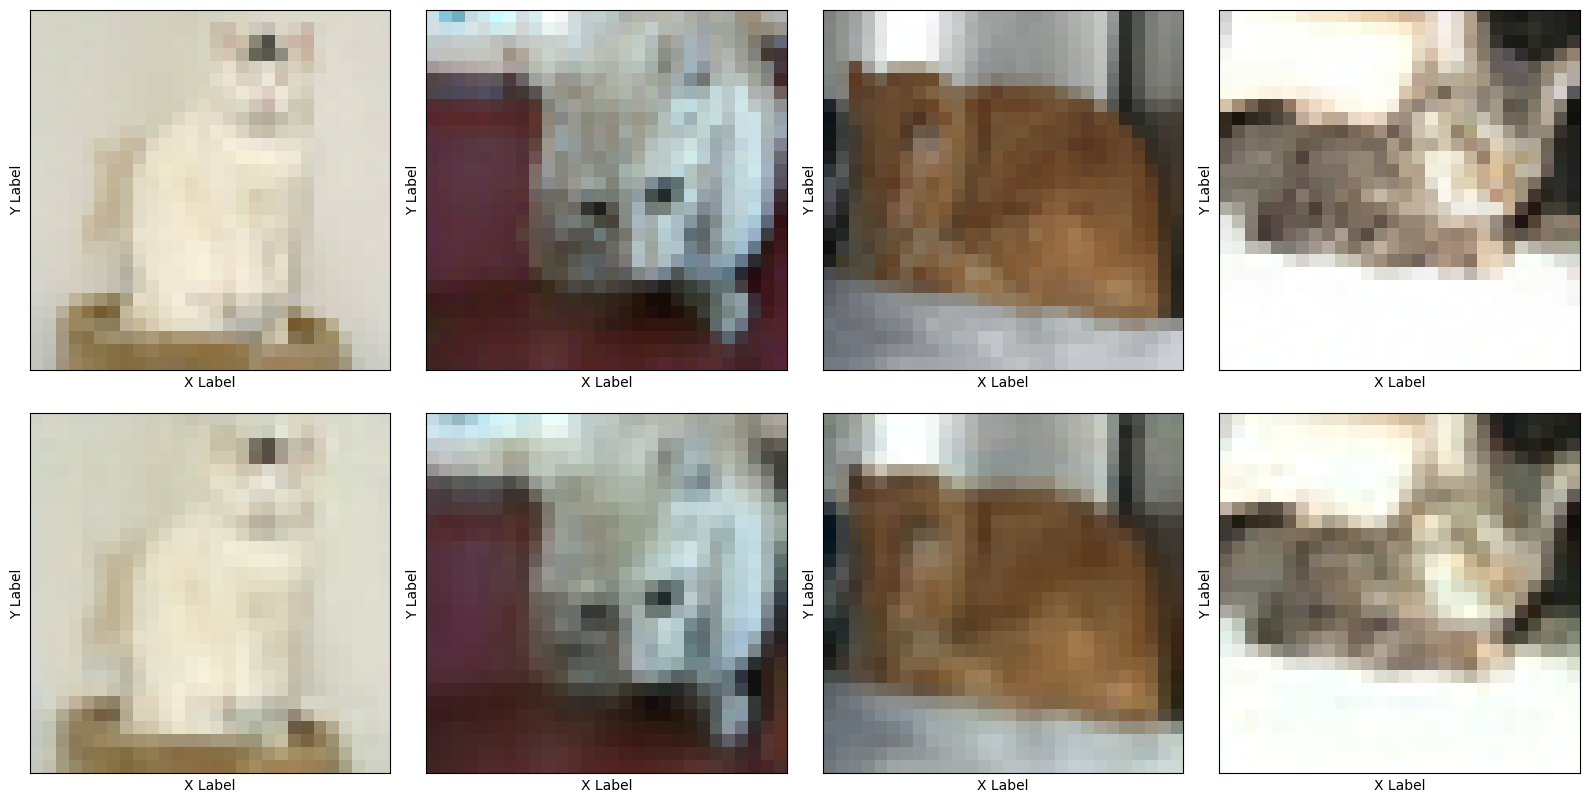

In [ ]:

n = 4
fig = plt.figure(figsize=(20, 10),)

for i in range(n):
    ax = fig.add_subplot(2, n, i + 1)
    ax.imshow(x_test_noisy[i + 20])
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_xticks([])
    ax.set_yticks([])

    ax = fig.add_subplot(2, n, i + 1 + n)
    ax.imshow(predictions[i + 20])
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_xticks([])
    ax.set_yticks([])


plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig("cats4404.png")
plt.show()

1/1 [==============================] - 0s 122ms/step


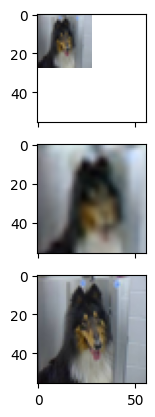

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
model = load_model('catsvdogs_10epochs_lownoise.h5')
orig_image = Image.open('data/test1/62.jpg')

pred_image = np.array(orig_image.copy().resize((28, 28)))
generated = model.predict(pred_image.reshape((1, 28, 28, 3)))
truth = orig_image.copy().resize((56, 56))
generated_image = np.reshape(generated, (28, 28, 3))
generated_image = array_to_img(generated_image)
generated_image = np.array(generated_image.copy().resize((64,64)))

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
#f, (ax1, ax3) = plt.subplots(2, sharex=True, sharey=True)
ax1.imshow(pred_image)
ax2.imshow(generated_image)
ax3.imshow(truth)
plt.savefig("dog3003.png")
plt.show()

1/1 [==============================] - 0s 30ms/step


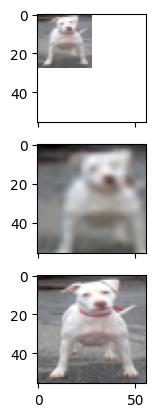

In [ ]:
orig_image = Image.open('data/test1/31.jpg')

pred_image = np.array(orig_image.copy().resize((28, 28)))
generated = model.predict(pred_image.reshape((1, 28, 28, 3)))
truth = orig_image.copy().resize((56, 56))
generated_image = np.reshape(generated, (28, 28, 3))
generated_image = array_to_img(generated_image)
generated_image = np.array(generated_image.copy().resize((64,64)))

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
#f, (ax1, ax3) = plt.subplots(2, sharex=True, sharey=True)
ax1.imshow(pred_image)
ax2.imshow(generated_image)
ax3.imshow(truth)
plt.savefig("dog3330.png")
plt.show()

1/1 [==============================] - 0s 17ms/step


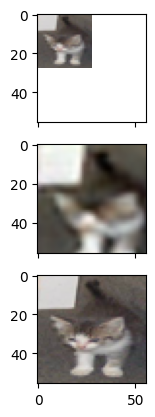

In [ ]:
orig_image = Image.open('data/test1/35.jpg')

pred_image = np.array(orig_image.copy().resize((28, 28)))
generated = model.predict(pred_image.reshape((1, 28, 28, 3)))
truth = orig_image.copy().resize((56, 56))
generated_image = np.reshape(generated, (28, 28, 3))
generated_image = array_to_img(generated_image)
generated_image = np.array(generated_image.copy().resize((64,64)))

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
#f, (ax1, ax3) = plt.subplots(2, sharex=True, sharey=True)
ax1.imshow(pred_image)
ax2.imshow(generated_image)
ax3.imshow(truth)
plt.savefig("kitty33330.png")
plt.show()